In [2]:
import pandas as pd
from scipy import stats 
import seaborn as sns 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

# Setting up pandas settings for better console output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)

In [3]:

# Read Files
# Train Data
cars = pd.read_csv(".\\Data\\SeperatedTestData\\TrainData.csv", sep=";")  
# Test Data
testCars = pd.read_csv(".\\Data\\SeperatedTestData\\Testdata.csv", sep=";")  

#Save prices for later
originalPrices = testCars.Price
#Drop the original price of test data, to predict them later
testCars = testCars.drop('Price', axis=1)

# Split up training Data
X = cars.drop('Price', 1) 
Y = cars.Price 
X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, train_size=0.7, test_size=0.3) 

In [18]:
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures 

lm = linear_model.LinearRegression() 

lm.fit(X_train, y_train) 

testPrediction = lm.predict(X_test) 
print("Score: " + str(r2_score(y_true=y_test, y_pred=testPrediction))+ " \n")

prediction = lm.predict(testCars) 
print("Prediction:\n")
print(prediction)


Score: 0.38825086574714096 

Prediction:

[6064.14180795 5927.56436758 5927.56436758 5276.45890425 6476.53413877
 6497.0169208  5036.5268827  5567.76908002 6654.59770442 6098.49947823
 6233.72478369 5899.08121189 5899.08121189 5282.49573804 5282.49573804
 5282.49573804 5655.98529474 6602.87080456 5655.98529474 6647.1511966
 6109.03205909 5444.34741427 5304.17002587 5756.73574578 5513.69732165
 5815.85217858 5444.34741427 5304.17002587 5756.73574578 3966.29435368
 5330.51343725 3966.29435368 5330.51343725 4942.045019   3966.29435368
 5158.72611324 4095.12810124 5158.72611324 4095.12810124 5158.72611324
 5325.93634295 4771.34208529 4847.5512503  4771.34208529 3533.74633348
 3396.13482584 3533.74633348 3905.64352641 3397.51906    3533.74633348
 3397.51906    3533.74633348 3396.13482584 3397.51906    3533.74633348
 4590.14851507 4590.14851507 4696.26072454]


In [ ]:
import statsmodels.api as sm 

#Ordinary Least Squars
model = sm.OLS(Y, X).fit() 

realPrediction = model.predict(testCars) 
print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")
print("Prediction:\n")
print(realPrediction)

In [5]:
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree = 2)
xp = polyFeatures.fit_transform(X=X)

model = sm.OLS(Y, xp).fit() 

#print(model.summary())


testCarsPoly = polyFeatures.fit_transform(X=testCars)


realPrediction = model.predict(testCarsPoly) 
print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")


print("Prediction:\n")
print(realPrediction)

(5076, 55)
Score: 0.6254477949422215 

Prediction:

[6495.32917661 6734.26855612 6734.26855612 5782.72421845 6689.31429988
 6807.59509142 6158.13838246 5690.88808645 7021.73910923 6114.24584696
 6541.09598534 6296.03834544 6296.03834544 5127.05223575 5127.05223575
 5127.05223575 6130.27950924 6918.53617934 6130.27950924 7439.2823592
 6603.2819198  5377.4346288  5369.36771619 5960.79132597 6109.80613497
 7126.6272274  5377.4346288  5369.36771619 5960.79132597 3949.21355673
 6018.57214217 3949.21355673 6018.57214217 4768.88552992 3949.21355673
 5204.94627496 4133.28303256 5204.94627496 4133.28303256 5204.94627496
 5947.00830621 4482.98944148 4543.64561582 4482.98944148 3210.08703505
 3030.83994166 3210.08703505 3106.6049005  3268.0465309  3210.08703505
 3268.0465309  3210.08703505 3030.83994166 3268.0465309  3210.08703505
 3972.27234289 3972.27234289 4488.51821422]


In [23]:
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree = 3)
xp = polyFeatures.fit_transform(X=X)

model = sm.OLS(Y, xp).fit() 

testCarsPoly = polyFeatures.fit_transform(X=testCars)
realPrediction = model.predict(testCarsPoly) 

print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")

print("Prediction:\n")
print(realPrediction)


Score: 0.6409937291797411 

Prediction:

[5732.50579877 7133.25818957 7133.25818957 6053.04164545 6237.69245479
 6885.01111747 7035.95516503 5662.20297853 6858.62140411 6060.2158557
 7155.37124844 6751.20269457 6751.20269457 5141.43339476 5141.43339476
 5141.43339476 5887.15756821 7298.29060911 5887.15756821 7415.4587578
 6381.80284417 5396.41860036 5137.23547725 6078.37461001 6430.28907909
 8278.66998984 5396.41860036 5137.23547725 6078.37461001 4018.96210114
 5656.41640585 4018.96210114 5656.41640585 4580.47943766 4018.96210114
 4727.09232928 4395.95083133 4727.09232928 4395.95083133 4727.09232928
 5714.33042216 4863.15099443 4576.0006888  4863.15099443 2529.69918301
 3064.69974898 2529.69918301 3150.98851702 2978.91954948 2529.69918301
 2978.91954948 2529.69918301 3064.69974898 2978.91954948 2529.69918301
 3839.7412357  3839.7412357  4498.68787483]


In [24]:
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

#X - Testdata
#Y - Expected Result

polyFeatures = PolynomialFeatures(degree = 4)
xp = polyFeatures.fit_transform(X=X)

model = sm.OLS(Y, xp).fit() 

#print(model.summary())
print(model.rsquared) 
testCarsPoly = polyFeatures.fit_transform(X=testCars)
realPrediction = model.predict(testCarsPoly) 

print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")
print("Prediction:\n")
print(realPrediction)

0.546204349306213
Score: 0.6121931469923452 

Prediction:

[6208.947034   6828.44905212 6828.44905212 5997.81783411 6081.8205776
 6129.49766691 6474.02525805 5630.48166    6724.5765954  6101.59507331
 6837.9414303  6371.26802897 6371.26802897 5088.41544197 5088.41544197
 5088.41544197 5865.44053824 6772.02696718 5865.44053824 6809.76946278
 6376.53684945 5490.62097872 5514.89010934 6168.72002128 6375.50403119
 7379.74855078 5490.62097872 5514.89010934 6168.72002128 3725.51072823
 6119.74329244 3725.51072823 6119.74329244 4807.29755738 3725.51072823
 4851.71169102 4000.75373496 4851.71169102 4000.75373496 4851.71169102
 6082.13928021 4814.19472347 4365.25327366 4814.19472347 2956.51196472
 3197.51185404 2956.51196472 2763.63804173 2740.46245402 2956.51196472
 2740.46245402 2956.51196472 3197.51185404 2740.46245402 2956.51196472
 4099.67841764 4099.67841764 4176.57186773]


In [21]:
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree = 5)
xp = polyFeatures.fit_transform(X=X)

model = sm.OLS(Y, xp).fit() 

testCarsPoly = polyFeatures.fit_transform(X=testCars)
realPrediction = model.predict(testCarsPoly) 

print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")

print("Prediction:\n")
print(realPrediction)


Score: 0.5493671971919467 

Prediction:

[5724.82232098 6925.21818924 6925.21818924 5749.4525589  5843.36858586
 6153.74598325 6828.28804055 5515.84380024 6333.48232163 6028.06809173
 6760.22527629 6726.01972155 6726.01972155 5198.299766   5198.299766
 5198.299766   5406.29329559 6695.52319438 5406.29329559 6034.24070758
 5772.76427217 5550.94951868 5222.17684096 6251.65030279 6140.06058281
 6810.2501774  5550.94951868 5222.17684096 6251.65030279 3894.09408963
 5787.50152028 3894.09408963 5787.50152028 5053.08825895 3894.09408963
 5195.99460662 4162.0291501  5195.99460662 4162.0291501  5195.99460662
 6305.833219   4861.34465898 4528.02884394 4861.34465898 3317.74787236
 2996.33642407 3317.74787236 2852.98406348 2683.99135478 3317.74787236
 2683.99135478 3317.74787236 2996.33642407 2683.99135478 3317.74787236
 4436.96727786 4436.96727786 4857.53949498]


In [25]:
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree = 6)
xp = polyFeatures.fit_transform(X=X)

model = sm.OLS(Y, xp).fit() 

testCarsPoly = polyFeatures.fit_transform(X=testCars)
realPrediction = model.predict(testCarsPoly) 
model.get_prediction()

print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")

print("Prediction:\n")
print(realPrediction)


Score: 0.38267458234725393 

Prediction:

[5682.69099886 4572.91905095 4572.91905095 6405.05996864 5997.25147308
 6497.39548687 4671.29653772 5783.14122423 6488.58592394 5287.14707318
 5672.68267436 5342.53591056 5342.53591056 5651.27222823 5651.27222823
 5651.27222823 5118.54036576 5479.71250321 5118.54036576 5794.01225589
 5234.10966434 6094.85811776 5522.87424767 6350.40442886 6288.16577336
 4678.06688579 6094.85811776 5522.87424767 6350.40442886 3986.49226241
 5794.45673062 3986.49226241 5794.45673062 5694.37242862 3986.49226241
 5522.78114207 4650.75285302 5522.78114207 4650.75285302 5522.78114207
 5592.910083   4408.98239981 4391.71535895 4408.98239981 2920.19973765
 3340.31960394 2920.19973765 3190.37770546 2894.58883963 2920.19973765
 2894.58883963 2920.19973765 3340.31960394 2894.58883963 2920.19973765
 4747.09449734 4747.09449734 5530.4913831 ]


In [9]:
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree = 8)
xp = polyFeatures.fit_transform(X=X)

model = sm.OLS(Y, xp).fit() 

testCarsPoly = polyFeatures.fit_transform(X=testCars)
realPrediction = model.predict(testCarsPoly) 

print("Score: " + str(r2_score(y_true=originalPrices, y_pred=realPrediction))+ " \n")

print("Prediction:\n")
print(realPrediction)


(5076, 24310)
-2.980680322092042
Score: -3.274602388661407 

Prediction:

[ 3351.76199568   121.42892976   121.42892976  1279.89107517
  3116.35660073  1096.00442989   135.28666916  1797.63397207
  1343.79711304  5102.93129814   322.44642918   331.36925387
   331.36925387  2193.10720346  2193.10720346  2193.10720346
  3157.36294094   449.6169893   3157.36294094  2040.4282677
  3363.10484612  1948.20287114  2221.09035206   754.33951733
   751.57619598   185.93257579  1948.20287114  2221.09035206
   754.33951733  4288.63815403  1077.18732016  4288.63815403
  1077.18732016  2379.4629467   4288.63815403  3463.17395825
  2887.48317212  3463.17395825  2887.48317212  3463.17395825
   563.31513619  4723.9896731   5076.17732791  4723.9896731
 -2485.88798628  5288.8981916  -2485.88798628  4807.83687454
  4694.55371508 -2485.88798628  4694.55371508 -2485.88798628
  5288.8981916   4694.55371508 -2485.88798628  6460.56198083
  6460.56198083  4018.74994468]


In [26]:
from catboost import CatBoostRegressor 

# alternative Models
#model = CatBoostRegressor(iterations=1000, learning_rate=0.03)     #0.8956337512894534 	#bad
#model = CatBoostRegressor(iterations=1700, learning_rate=0.03)      #0.9388148446548709
#model = CatBoostRegressor(iterations=5000, learning_rate=0.03)      #0.975086189681504		# good
#model = CatBoostRegressor(iterations=55000, learning_rate=0.02)      #0.9801175821423871 	# bit overfitted

print("\n-------------------CatBoost---------------------")
print("Training CatBoostRegressor -  This will take up to 25 Seconds")

#best till now 
model = CatBoostRegressor(iterations=10000, learning_rate=0.03)      #0.9797954315617974

model.fit( 
    X_train, y_train, 
    eval_set=(X_test, y_test),
    silent=True # turn FALSE if output should be seen
) 
print("Score: " + str(model.score(X, Y)) + " \n")

fitModel = pd.DataFrame(columns=cars.columns) 
fitModel = fitModel.append(testCars, ignore_index=True) 
fitModel = fitModel.fillna(0) 
prediction = model.predict(fitModel)
print("Prediction:\n")
print(prediction)

print("---------------CatBoost-Done--------------------\n")



-------------------CatBoost---------------------
Training CatBoostRegressor -  This will take up to 25 Seconds
Score: 0.9764605278523313 

Prediction:

[8415.32250798 8270.52226369 8270.52226369 7259.70049211 6946.34250115
 5929.44339684 7849.38809066 5859.6310877  7866.07009252 7904.80146162
 7603.10471714 7268.92284187 7268.92284187 7444.57066136 7444.57066136
 7444.57066136 7306.94935775 6603.26154922 7306.94935775 7001.79993857
 7014.85302003 6005.05240186 5718.43128004 5986.0439691  6043.94100327
 5992.44169207 6005.05240186 5718.43128004 5986.0439691  4935.64442639
 4935.94814349 4935.64442639 4935.94814349 4980.27972054 4935.64442639
 3999.3639225  3993.5285802  3999.3639225  3993.5285802  3999.3639225
 3082.07522305 3947.90582745 3012.6898192  3947.90582745 2499.52076856
 2502.35094202 2499.52076856 2514.28661967 2615.95478438 2499.52076856
 2615.95478438 2499.52076856 2502.35094202 2615.95478438 2499.52076856
 1444.79244027 1444.79244027 1506.48682989]
Score: 0.95659953554343

Price                1.000000
FirstRegistration    0.365506
PowerPs              0.145734
CubicCapacity        0.100766
HuTest               0.035448
Owners               0.022309
Color               -0.021476
EmptyWeight         -0.035655
Automatic           -0.040036
Mileage             -0.448828
Name: Price, dtype: float64


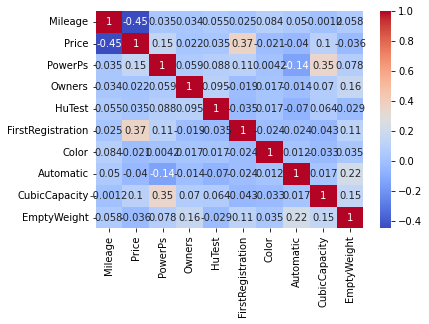

In [ ]:
corr = cars.corr()
print(corr.Price.sort_values(ascending = False))
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm') 
plt.pyplot.show()